# Clustering

El *Clustering*, clasificación o agrupamiento es una técnica de aprendizaje automático que consiste en crear grupos de datos que tienen ciertas características comunes. Esta técnica refiere a un algoritmo no supervisado ya que no requiere predecir una variable de salida, esto es que no se requieren datos históricos para el análisis.

Los clusters o grupos que se construyan deben tiener las siguientes características:
* Identificables y de tamaño considerable
* Los puntos de un mismo cluster deben ser compactos y tener intersección mínima con otros clusters
* Los puntos de un mismo cluster deben tener propiedades comunes en el contexto estudiado

Las aplicaciones del clustering se encuentran en:
* Mercadotecnia digital
* Taxonomía de seres vivos
* Imputación de valores en una base de datos
* Planificación urbana

Principalmente, el clustering mide las semejanzas o diferencias de las distintas observaciones.

Para un ejemplo de clasificación en la valoración de películas por parte de distintos usuarios se tiene:
* $n$ es el número de películas
* $N$ es el número de usuarios 
* $x = \{x_k\}$ donde $k = 1, 2, ...,i, j, ..., N$ es el conjunto de valoraciones de los usuarios
* $x_i = (x_{i1}, x_{i2},...,x_{il}, ...,x_{in})$ denota las valoraciones del usuario $i$ de cada una de las películas.

Una de las formas más comunes de calcular la distancia entre pues es por medio de:
* La **distancia de Manhattan:**
$$ D(x_i,x_j) = \left | x_{i1}-x_{j1} \right | + \left | x_{i2}-x_{j2} \right | + ... + \left | x_{in}-x_{jn} \right |  = \sum_{k=1}^{n}\left | x_{ik}-x_{jk} \right | $$
* La **distancia Euclídea:**
$$ D(x_i,x_j) = \sqrt{(x_{i1}-x_{j1})^2 + (x_{i2}-x_{j2})^2 + ... + (x_{in}-x_{jn})^2} = \sqrt{\sum_{k=1}^{n}( x_{ik}-x_{jk})^2} $$
* La **distancia de Minkowski:**
$$ D(x_i,x_j) = ((x_{i1}-x_{j1})^p + (x_{i2}-x_{j2})^p + ... + (x_{in}-x_{jn})^p)^{\frac{1}{p}} = (\sum_{k=1}^{n}( x_{ik}-x_{jk})^p)^{\frac{1}{p}}$$ donde $p \ge 1$



La distancia de Minkowski reúne las distancias de Manhattan y Euclídea para $p=1$ y $p=2$ respectivamente. La implementación de esta distancia puede hacerse por medio del método `distance_matrix` del paquete `scipy.spatial` de Python.

Es importante normalizar los valores del conjunto de datos para calcular distancias más certeras:
$$ z_{ij} = \frac{x_{ij}-min(x_{*j})}{max(x_{*j})-min(x_{*j}) } $$

## Distancias

In [337]:
from scipy.spatial import distance_matrix
import pandas as pd

In [338]:
mainpath = "/home/oscar/Documentos/udemy/machine-learning-joanby/python-ml-course-master/datasets"
filename = "/movies/movies.csv"
fullpath = mainpath + filename

data = pd.read_csv(fullpath, sep=';')

In [339]:
data.head()

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6


In [340]:
movies = data.columns.values.tolist()[1:]

In [341]:
movies

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [342]:
# calcula la distancia de Manhatan
dd1 = distance_matrix(data[movies], data[movies], p = 1)

In [343]:
# calcula la distancia Euclídea
dd2 = distance_matrix(data[movies], data[movies], p = 2)

In [344]:
# calcula la distancia de Minkowski con p=10
dd10 = distance_matrix(data[movies], data[movies], p = 10)
dd10

array([[0.        , 5.80151405, 7.87518912, 4.71580324, 3.4       ,
        4.40000323, 6.40084969, 4.40102467, 3.20008504, 0.3010246 ],
       [5.80151405, 0.        , 5.58246346, 7.68068873, 5.3       ,
        4.40000468, 0.6       , 3.4000102 , 6.43515864, 5.60379989],
       [7.87518912, 5.58246346, 0.        , 8.10000659, 7.40891444,
        4.91253202, 5.68944974, 6.57025374, 6.82060178, 7.65836384],
       [4.71580324, 7.68068873, 8.10000659, 0.        , 7.80125508,
        4.71710153, 7.87330678, 8.80020486, 3.00010148, 4.45075873],
       [3.4       , 5.3       , 7.40891444, 7.80125508, 0.        ,
        4.68146419, 5.9       , 1.90030967, 6.60000001, 3.6       ],
       [4.40000323, 4.40000468, 4.91253202, 4.71710153, 4.68146419,
        0.        , 4.50013531, 5.60001891, 3.40168276, 4.20000049],
       [6.40084969, 0.6       , 5.68944974, 7.87330678, 5.9       ,
        4.50013531, 0.        , 4.00000099, 6.59525879, 6.20203476],
       [4.40102467, 3.4000102 , 6.5702537

In [345]:
# convierte las matrices de distancias a dataframes
def dn_to_df(dd, col_name):
    return pd.DataFrame(dd, index = col_name, columns = col_name) # crea índices y columnas con mismo nombre

In [346]:
dn_to_df(dd1, data['user_id'] )

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


In [347]:
dn_to_df(dd2, data['user_id'] )

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,6.685058,10.143471,6.229767,3.449638,4.742362,7.244998,5.047772,3.633180,0.412311
2,6.685058,0.000000,7.622336,10.354709,5.337602,4.634652,0.616441,3.618011,8.015610,6.578754
3,10.143471,7.622336,0.000000,8.666026,10.779147,6.004998,7.626270,10.010494,8.424369,9.770363
4,6.229767,10.354709,8.666026,0.000000,8.848164,6.476110,10.823123,9.958414,3.482815,5.890671
5,3.449638,5.337602,10.779147,8.848164,0.000000,6.113101,5.921993,2.167948,6.709694,3.612478
6,4.742362,4.634652,6.004998,6.476110,6.113101,0.000000,4.949747,5.987487,3.945884,4.431704
7,7.244998,0.616441,7.626270,10.823123,5.921993,4.949747,0.000000,4.153312,8.471718,7.137226
8,5.047772,3.618011,10.010494,9.958414,2.167948,5.987487,4.153312,0.000000,7.769170,5.107837
9,3.633180,8.015610,8.424369,3.482815,6.709694,3.945884,8.471718,7.769170,0.000000,3.293934


In [348]:
dn_to_df(dd10, data['user_id'] )

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,5.801514,7.875189,4.715803,3.400000,4.400003,6.400850,4.401025,3.200085,0.301025
2,5.801514,0.000000,5.582463,7.680689,5.300000,4.400005,0.600000,3.400010,6.435159,5.603800
3,7.875189,5.582463,0.000000,8.100007,7.408914,4.912532,5.689450,6.570254,6.820602,7.658364
4,4.715803,7.680689,8.100007,0.000000,7.801255,4.717102,7.873307,8.800205,3.000101,4.450759
5,3.400000,5.300000,7.408914,7.801255,0.000000,4.681464,5.900000,1.900310,6.600000,3.600000
6,4.400003,4.400005,4.912532,4.717102,4.681464,0.000000,4.500135,5.600019,3.401683,4.200000
7,6.400850,0.600000,5.689450,7.873307,5.900000,4.500135,0.000000,4.000001,6.595259,6.202035
8,4.401025,3.400010,6.570254,8.800205,1.900310,5.600019,4.000001,0.000000,7.600000,4.600288
9,3.200085,6.435159,6.820602,3.000101,6.600000,3.401683,6.595259,7.600000,0.000000,3.000014


In [349]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

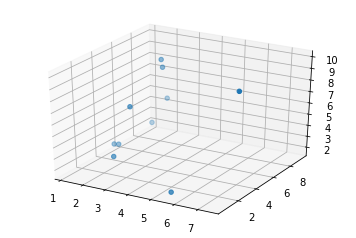

In [350]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs = data['star_wars'], ys = data['lord_of_the_rings'], zs = data['harry_potter'])

## Clustering Jerárquico
Una vez que se han calculado las distancias entre los datos, se procede a la aglomeración o disociación en grupos. Cuando se trata de agrupar, cada punto empieza siendo un único cluster y se va iterando la agrupación. A cada paso se van anexando nuevos puntos a cada cluster, hasta tener un único cluster basado en las similitudes entre observaciones.

Así:
1. Se inicia con $n$ clusters correspondiente a cada punto.
2. Se encuentra la menor distnacia en la matriz de distancias y se unen las observaciones en un nuevo cluster
3. Por medio de un **métrica de enlace** se recalculan las distancias entre los clusters anteriores y el recién creado
4. Se itera sobre los pasos 2 y 3.


Las métricas o métodos de enlace más comunes son:
* **Enlace simple:** La distancia entre dos clusters es el *mínimo* de las distancias entre cualquiera dos puntos del Cluster 1 y el Cluster 2.
$$d(C_m,C_n) = min(d(x_i,y_i)) \:\forall x_i \in C_m, \: y_i \in C_n$$


* **Enlace completo:** La distancia entre dos clusters es el *máximo* de las distancias entre cualquiera dos puntos del Cluster 1 y el Cluster 2.
$$d(C_m,C_n) = max(d(x_i,y_i)) \:\forall x_i \in C_m, \: y_i \in C_n$$


* **Enlace promedio:** La distancia entre dos clusters es el *promedio* de las distancias entre cualquiera dos puntos del Cluster 1 y el Cluster 2.
$$d(C_m,C_n) = mean(d(x_i,y_i)) \:\forall x_i \in C_m, \: y_i \in C_n$$


* **Enlace promedio:** La distancia entre dos clusters es el *centroide* (punto medio) del Cluster 1 y el *centroide* del Cluster 2.
$$d(C_m,C_n) = d(\overline{C_m}, \overline{C_n}$$



### Enlaces

Iniciaremos haciendo una agrupación manual de los elementos del cluster.

In [351]:
data = dn_to_df(dd1, data['user_id'])
data

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


Usando el criterio de **enlace simple** se identifica el menor valor de los elementos, descartando los cero's. Ese valor va a definir los renglones y columnas que se van agrupar. 

In [352]:
# se crea una lista vacía donde se escribirá la información de cada cluster
# lista de elementos, distancia, nuevo cluster, número de elementos agrupados
w = []

In [353]:
data[11] = data[1] + data[10] # se unen dos columnas en una nueva
data.loc[11] = data.loc[1] + data.loc[10] # se unen dos renglones en uno nuevo
w.append([1, 10, 0.7, 11, 2]) #id1, id2, distancia, idnuevo, 2 agrupados 
data

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,19.5
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,31.1
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,17.9
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,8.1
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,13.1
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,20.7
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,14.5
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,10.5


Se comparan cada pareja de elementos de las dos columnas y los dos renglones anteriores y se colocan en el nuevo renglón y columna creado:

In [354]:
for i in data.columns.values.tolist():
    # compara elementos de columnas 1 y 10, toma el mínimo y lo coloca en la columna 11
    data.loc[11][i] = min(data.loc[1][i], data.loc[10][i])
    # compara elementos de los renglones 1 y 10, toma el mínimo y lo coloca en el renglón 11
    data.loc[i][11] = min(data.loc[i][1], data.loc[i][10])
data

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.0
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,4.9


In [355]:
# elimina las columnas 1 y 10 y renglones 1 y 10
data = data.drop([1,10]) # elimina columnas
data = data.drop([1,10], axis = 1) # elimina renglones
data

user_id,2,3,4,5,6,7,8,9,11
user_id,,,,,,,,,
2,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9
11,9.6,15.2,8.8,3.9,6.2,10.2,7.1,4.9,0.0


Se eliminaron dos columnas y dos renglones y fueron integradas mediante el enlace simpre en un renglón y una columna.
De igual manera se procederá para continuar eliminando renglones y columnas.

Se elige un el siguiente valor mínimo de la nueva matriz y se identifican los siguientes renglón y columna a integrar. Para iterar este proceso hacemos lo siguiente:

In [356]:
x = 2
y = 7

n = 12

data[n] = data[x] + data[y] # se unen dos columnas en una nueva
data.loc[n] = data.loc[x] + data.loc[y] # se unen dos renglones en uno nuevo
w.append([x, y, data.loc[x][y], n, 2]) #i d1, id2, distancia, idnuevo, 2 agrupados 

for i in data.columns.values.tolist():
    # compara elementos de columnas x e y, toma el mínimo y lo coloca en la columna n
    data.loc[n][i] = min(data.loc[x][i], data.loc[y][i])
    # compara elementos de los renglones x e y, toma el mínimo y lo coloca en el renglón n
    data.loc[i][n] = min(data.loc[i][x], data.loc[i][y])

data = data.drop([x,y]) # elimina columnas
data = data.drop([x,y], axis = 1) # elimina renglones
data


user_id,3,4,5,6,8,9,11,12
user_id,,,,,,,,
3,0.0,12.4,18.5,9.0,17.3,12.9,15.2,12.0
4,12.4,0.0,12.7,11.0,15.3,5.5,8.8,17.2
5,18.5,12.7,0.0,9.5,3.2,8.2,3.9,6.1
6,9.0,11.0,9.5,0.0,8.3,5.5,6.2,6.2
8,17.3,15.3,3.2,8.3,0.0,9.8,7.1,4.9
9,12.9,5.5,8.2,5.5,9.8,0.0,4.9,11.7
11,15.2,8.8,3.9,6.2,7.1,4.9,0.0,9.6
12,12.0,17.2,6.1,6.2,4.9,11.7,9.6,0.0


In [357]:
w

[[1, 10, 0.7, 11, 2], [2, 7, 0.7999999999999994, 12, 2]]

Continuamos iterando el procedimiento...

In [358]:
x = 5
y = 8

n = 13

data[n] = data[x] + data[y] # se unen dos columnas en una nueva
data.loc[n] = data.loc[x] + data.loc[y] # se unen dos renglones en uno nuevo
w.append([x, y, data.loc[x][y], n, 2]) # id1, id2, distancia, idnuevo, 2 agrupados  

for i in data.columns.values.tolist():
    # compara elementos de columnas x e y, toma el mínimo y lo coloca en la columna n
    data.loc[n][i] = min(data.loc[x][i], data.loc[y][i])
    # compara elementos de los renglones x e y, toma el mínimo y lo coloca en el renglón n
    data.loc[i][n] = min(data.loc[i][x], data.loc[i][y])

data = data.drop([x,y]) # elimina columnas
data = data.drop([x,y], axis = 1) # elimina renglones
data

user_id,3,4,6,9,11,12,13
user_id,,,,,,,
3,0.0,12.4,9.0,12.9,15.2,12.0,17.3
4,12.4,0.0,11.0,5.5,8.8,17.2,12.7
6,9.0,11.0,0.0,5.5,6.2,6.2,8.3
9,12.9,5.5,5.5,0.0,4.9,11.7,8.2
11,15.2,8.8,6.2,4.9,0.0,9.6,3.9
12,12.0,17.2,6.2,11.7,9.6,0.0,4.9
13,17.3,12.7,8.3,8.2,3.9,4.9,0.0


In [359]:
w

[[1, 10, 0.7, 11, 2], [2, 7, 0.7999999999999994, 12, 2], [5, 8, 3.2, 13, 2]]

Continuamos iterando el procedimiento...

In [360]:
x = 11
y = 13

n = 14

data[n] = data[x] + data[y] # se unen dos columnas en una nueva
data.loc[n] = data.loc[x] + data.loc[y] # se unen dos renglones en uno nuevo
w.append([x, y, data.loc[x][y], n, 2]) # id1, id2, distancia, idnuevo, 2 agrupados 

for i in data.columns.values.tolist():
    # compara elementos de columnas x e y, toma el mínimo y lo coloca en la columna n
    data.loc[n][i] = min(data.loc[x][i], data.loc[y][i])
    # compara elementos de los renglones x e y, toma el mínimo y lo coloca en el renglón n
    data.loc[i][n] = min(data.loc[i][x], data.loc[i][y])

data = data.drop([x,y]) # elimina columnas
data = data.drop([x,y], axis = 1) # elimina renglones
data

user_id,3,4,6,9,12,14
user_id,,,,,,
3,0.0,12.4,9.0,12.9,12.0,15.2
4,12.4,0.0,11.0,5.5,17.2,8.8
6,9.0,11.0,0.0,5.5,6.2,6.2
9,12.9,5.5,5.5,0.0,11.7,4.9
12,12.0,17.2,6.2,11.7,0.0,4.9
14,15.2,8.8,6.2,4.9,4.9,0.0


**Nota:** Para la siguiente iteración se observan dos mínimos iguales: 4.9, por lo tanto se puede hacer un cluster con tres elementos. Iteramos ...  

In [361]:
x = 9
y = 12
z = 14

n = 15

data[n] = data[x] + data[y] + data[z] # se unen dos columnas en una nueva
data.loc[n] = data.loc[x] + data.loc[y]+ data.loc[z] # se unen dos renglones en uno nuevo
w.append([x, y, data.loc[x][y], n, 3]) #id1, id2, id3, distancia, idnuevo, 3 agrupados  

for i in data.columns.values.tolist():
    # compara elementos de columnas x e y, toma el mínimo y lo coloca en la columna n
    data.loc[n][i] = min(data.loc[x][i], data.loc[y][i], data.loc[z][i] )
    # compara elementos de los renglones x e y, toma el mínimo y lo coloca en el renglón n
    data.loc[i][n] = min(data.loc[i][x], data.loc[i][y], data.loc[i][z])

data = data.drop([x,y,z]) # elimina columnas
data = data.drop([x,y,z], axis = 1) # elimina renglones
data

user_id,3,4,6,15
user_id,,,,
3,0.0,12.4,9.0,12.0
4,12.4,0.0,11.0,5.5
6,9.0,11.0,0.0,5.5
15,12.0,5.5,5.5,0.0


Iteramos con 3 elementos pues hay dos mínimos...

In [362]:
x = 4
y = 6
z = 15

n = 16

data[n] = data[x] + data[y] + data[z] # se unen dos columnas en una nueva
data.loc[n] = data.loc[x] + data.loc[y]+ data.loc[z] # se unen dos renglones en uno nuevo
w.append([x, y, data.loc[x][y], n, 3]) # id1, id2, id3, distancia, idnuevo, 3 agrupados  

for i in data.columns.values.tolist():
    # compara elementos de columnas x e y, toma el mínimo y lo coloca en la columna n
    data.loc[n][i] = min(data.loc[x][i], data.loc[y][i], data.loc[z][i] )
    # compara elementos de los renglones x e y, toma el mínimo y lo coloca en el renglón n
    data.loc[i][n] = min(data.loc[i][x], data.loc[i][y], data.loc[i][z])

data = data.drop([x,y,z]) # elimina columnas
data = data.drop([x,y,z], axis = 1) # elimina renglones
data

user_id,3,16
user_id,,
3,0.0,9.0
16,9.0,0.0


In [363]:
x = 3
y = 16

n = 17

data[n] = data[x] + data[y] # se unen dos columnas en una nueva
data.loc[n] = data.loc[x] + data.loc[y] # se unen dos renglones en uno nuevo
w.append([x, y, data.loc[x][y], n, 2]) #id1, id2, distancia, idnuevo, 2 agrupados 

for i in data.columns.values.tolist():
    # compara elementos de columnas x e y, toma el mínimo y lo coloca en la columna n
    data.loc[n][i] = min(data.loc[x][i], data.loc[y][i])
    # compara elementos de los renglones x e y, toma el mínimo y lo coloca en el renglón n
    data.loc[i][n] = min(data.loc[i][x], data.loc[i][y])

data = data.drop([x,y]) # elimina columnas
data = data.drop([x,y], axis = 1) # elimina renglones
data

user_id,17
user_id,
17,0.0


In [364]:
w

[[1, 10, 0.7, 11, 2],
 [2, 7, 0.7999999999999994, 12, 2],
 [5, 8, 3.2, 13, 2],
 [11, 13, 3.900000000000001, 14, 2],
 [9, 12, 11.7, 15, 3],
 [4, 6, 11.0, 16, 3],
 [3, 16, 9.0, 17, 2]]

La representación gráfica del proceso de agrupamiento sucesivo que se presentó anteriormente se hace mediante diagramas conocidos como **dendrogramas**.

![Dendograma](imagenes\dendograma.png "titulo")